# K Means Clustering with Python
---------------------------------------------------------
# Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. 

    Then, the algorithm iterates through two steps:
1. Reassign data points to the cluster whose centroid is closest.<br>
2. Calculate new centroid of each cluster. 

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Imports
**Import pandas, numpy, matplotlib,and seaborn.Then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

In [71]:
df = pd.read_csv('Mall_Customers.csv')

**Check the head of dataframe, and check out its info() and describe() methods.**

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [73]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check for null values

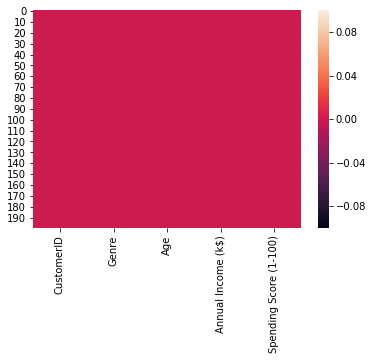

In [75]:
sns.heatmap(df.isnull())

# Handle Co-Relation

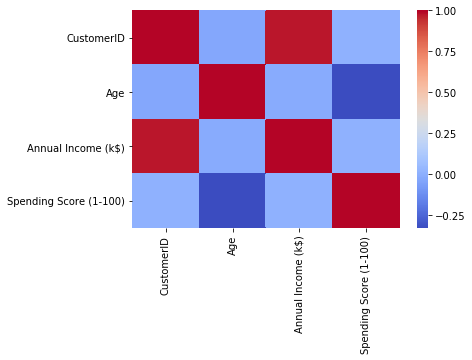

In [76]:
sns.heatmap(df.corr(), cmap='coolwarm')

**CustomerID, Age & Genre is not co-relerated with Spending Score**

In [77]:
df.drop(['CustomerID','Genre','Age'], axis=1, inplace=True)

In [78]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Data Visualization

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [80]:
x_pca = pca.fit_transform(df)

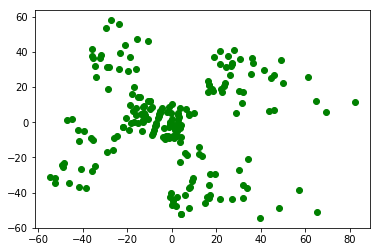

In [81]:
plt.scatter(x_pca[:,0] , x_pca[:,1],c='g')

## Using the elbow method to find the optimal number of clusters

* Determining WCSS(within cluster sum of squares) value based on number of cluster given to model
* more the no of cluster lesser will be WCSS  and vise-versa

In [58]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=1)

In [85]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [86]:
km.inertia_

44448.45544793371

In [87]:
km = KMeans(n_clusters=200)
km.fit(df)
km.inertia_

0.0

In [88]:
## in order to decide correct K value, apply for loop

wcss = []

for i in range(1,40):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

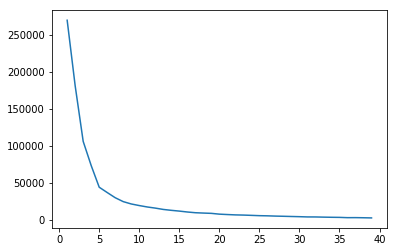

In [89]:
# observe the elbow
# elbow gives right no of clusters i.e 5 in this case

plt.plot(range(1,40) , wcss)

    To get array based on 5 clusters (dividing data into 5 clusters)

In [90]:
km = KMeans(n_clusters=5)
y = km.fit_predict(df)
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

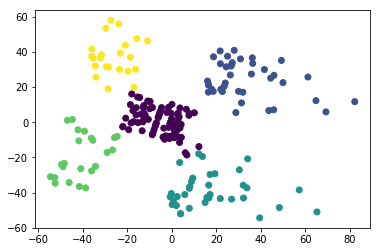

In [91]:
plt.scatter(x_pca[:,0] , x_pca[:,1], c = y)

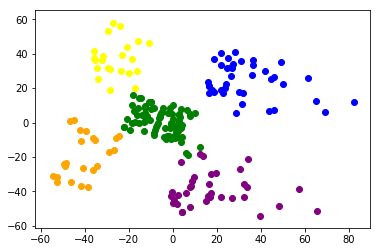

In [92]:
#alternative

plt.scatter(x_pca[y==0,0], x_pca[y==0,1] , color ='green')
plt.scatter(x_pca[y==1,0], x_pca[y==1,1] , color ='blue')
plt.scatter(x_pca[y==2,0], x_pca[y==2,1] , color ='purple')
plt.scatter(x_pca[y==3,0], x_pca[y==3,1] , color ='orange')
plt.scatter(x_pca[y==4,0], x_pca[y==4,1] , color ='yellow')

In [93]:
df['Cluster'] = y

In [94]:
df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [95]:
df['Cluster'] = df['Cluster'].map({0: 'MI , MS', 1: 'HI , HS', 2: 'HI , LS', 3: 'LI , LS', 4: 'LI , HS'})

In [97]:
df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,"LI , LS"
1,15,81,"LI , HS"
2,16,6,"LI , LS"
3,16,77,"LI , HS"
4,17,40,"LI , LS"
